In [2]:
import torch

In [3]:
#Tensors
x = torch.FloatTensor([[1,2,3],[4,5,6]])
print(x.size(), "\n", x)

torch.Size([2, 3]) 
 tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [4]:
#Add tensors
x.add_(torch.ones([2,3]) + torch.ones([2,3]))

tensor([[3., 4., 5.],
        [6., 7., 8.]])

In [5]:
#Subtract Tensor
x.sub_(torch.ones([2,3])*2)

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [6]:
#Numpy to torch tensors
import numpy as np
y = np.matrix([[2,2], [2,2], [2,2]])
z = np.matrix([[2,2], [2,2], [2,2]], dtype="int16")
x.short() @ torch.from_numpy(z)

tensor([[12, 12],
        [30, 30]], dtype=torch.int16)

In [7]:
#Reshape tensors(similar to np.reshape)
x.view(1,6)

tensor([[1., 2., 3., 4., 5., 6.]])

In [8]:
#move variables and copies across computer devices
x = torch.FloatTensor([[1,2,3], [4,5,6]])
y = np.matrix([[2,2,2], [2,2,2]], dtype="float32")

In [9]:
if(torch.cuda.is_available()):
    x = x.cuda();
    y = torch.from_numpy(y).cuda()
    z = x + y
print(z)
print(x.cpu())

[[2 2]
 [2 2]
 [2 2]]
tensor([[1., 2., 3.],
        [4., 5., 6.]])


# PyTorch Variables

In [14]:
#Variable(part of autograd package)
#Variable (graph nodes) are thin wrappers around tensors and hav

from torch.autograd import Variable

# Backpropagation


# SLR: Simple Linear Regression

In [10]:
#Simple Linear Regression
# Fit a line to the data. Y= w.x + b
# Deterministic behavior
np.random.seed(0)
torch.manual_seed(0)
# Step 1: Dataset
w = 2; b = 3
x = np.linspace(0,10,100)
y = w*x + b + np.random.randn(100) * 2
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [12]:
# Step 2: Model
class LinearRegressionModel(torch.nn.Module):
    def __init__(self,in_dimn,out_dimn):
        super(LinearRegressionModel,self).__init__()
        self.model=torch.nn.Linear(in_dimn,out_dimn)
        
    def forward(self,x):
        y_pred=self.model(x);
        return y_pred;
        
model=LinearRegressionModel(in_dimn=1, out_dimn=1)

In [ ]:
# Step 3: Training
cost = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
inputs = Variable(torch.from_numpy(x.astype("float32")))
outputs = Variable(torch.from_numpy(y.astype("float32")))

for epoch in range(100):
#3.1 forward pass:
    y_pred = model(inputs)
    
#3.2 compute loss
    loss = cost(y_pred, outputs)

#3.3 backward pass
    optimizer.zero_grad() # by default, gradient accumulate
    loss.backward()
    optimizer.step()
    if((epoch+1)%10==0):
        print("epoch{},loss{}".format(epoch+1,loss.data))

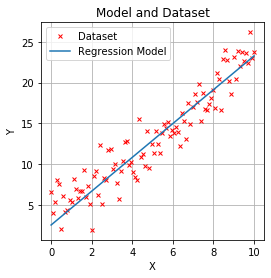

In [18]:
# Step 4: Display model and confirm
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.title("Model and Dataset")
plt.xlabel("X");plt.ylabel("Y")
plt.grid()
plt.plot(x,y,"ro",label="Dataset",marker="x",markersize=4)
plt.plot(x,model.model.weight.item()*x+model.model.bias.item(), label="Regression Model")
plt.legend();plt.show()